## Importing the libraries

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [28]:
data=pd.read_csv('Mall_Customers.csv')


In [29]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [30]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,Female,49,54,42
77,78,Male,40,54,48
32,33,Male,53,33,4
39,40,Female,20,37,75
175,176,Female,30,88,86


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

In [32]:
data.drop('CustomerID',inplace=True,axis=1)

In [33]:
data['Gender']=data['Gender'].map({'Female':0,'Male':1})

In [34]:
x=data.iloc[:,2:4]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Strorytelling - Visualization

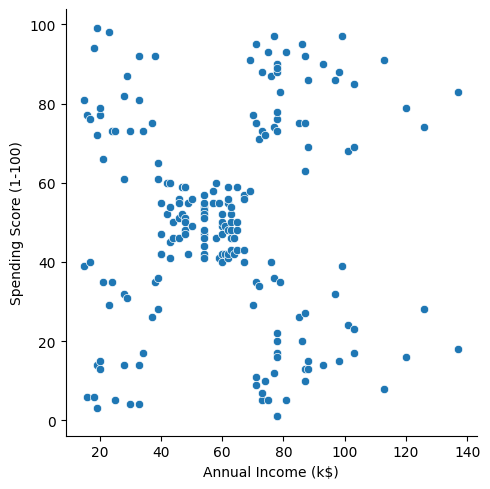

In [35]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)

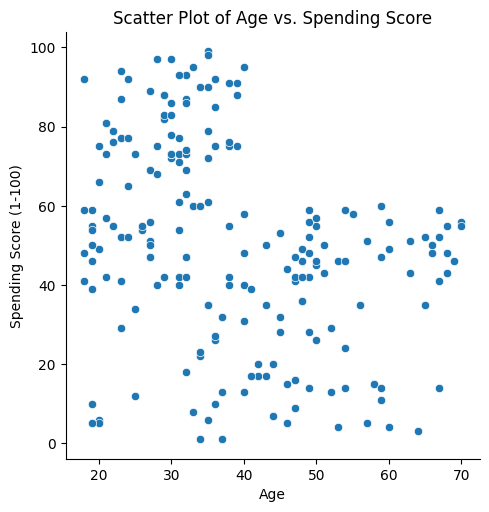

In [36]:
sns.relplot(x='Age', y='Spending Score (1-100)', data=data)
plt.title('Scatter Plot of Age vs. Spending Score')
plt.show()

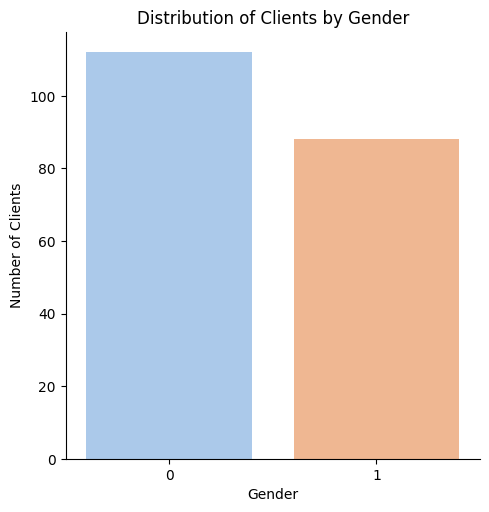

Most of the clients are women


In [37]:
# Plot count of clients by gender
sns.catplot(x='Gender', kind='count', data=data, palette='pastel')
plt.title('Distribution of Clients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.show()

# Print a statement about the distribution
print('Most of the clients are women')

women mostly score more than men


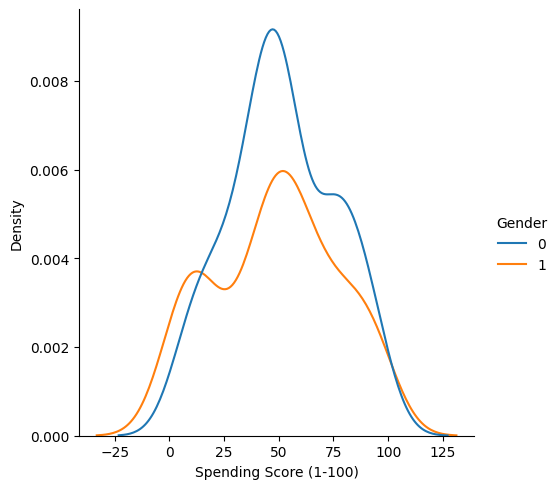

In [38]:
sns.displot(x="Spending Score (1-100)",hue='Gender', kind="kde", data=data)
print('women mostly score more than men')

this graph show that in this shop,women have more income


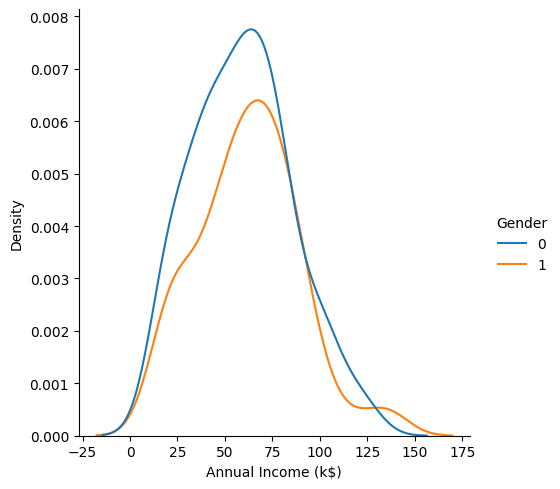

In [39]:
sns.displot(x="Annual Income (k$)",hue='Gender', kind="kde", data=data)
print('this graph show that in this shop,women have more income')

## Train the Model (Clustering)

In [40]:
from sklearn.cluster import KMeans
loss = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 85)
    km.fit(x)
    loss.append(km.inertia_)

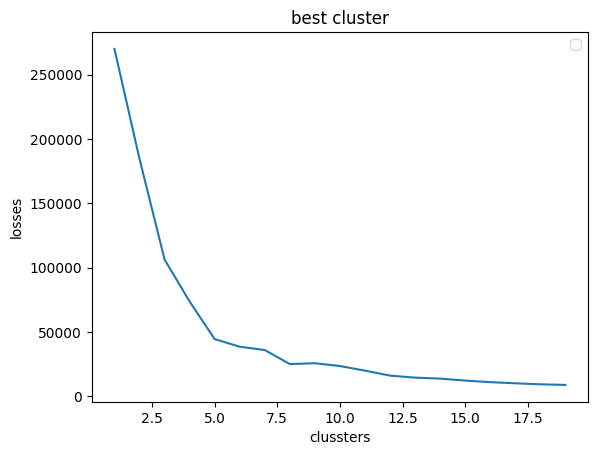

In [41]:
plt.plot(range(1,20),loss)
plt.xlabel('clussters')
plt.ylabel('losses')
plt.title("best cluster")
plt.legend()
plt.show()

In [42]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 85)
y_km = km.fit_predict(x)

In [43]:
c=['purple','green','blue','red','brown','yellow','black','magenta','cyan','pink']

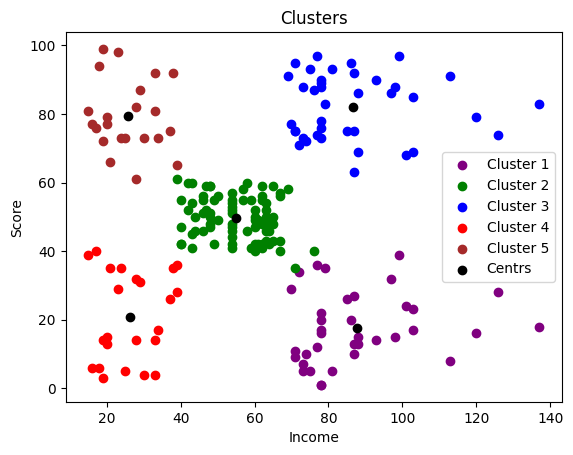

In [44]:
for i in range(5) :

    plt.scatter(x[y_km ==i]['Annual Income (k$)'],x[y_km ==i]['Spending Score (1-100)'],c=c[i],label =f'Cluster {i+1}')

plt.scatter(km.cluster_centers_[:5, 0], km.cluster_centers_[:5, 1], c = 'black', label = 'Centrs')
plt.title('Clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()


In [45]:
from sklearn.cluster import DBSCAN
for j in range (1,5) :
    for i in range(3,15) :
            db = DBSCAN(eps=i, min_samples=j).fit(x)
            print(f'number of clusters= {db.labels_.max()},the area (eps)={i},and the minumum samples in a cluster={j}')

   

number of clusters= 91,the area (eps)=3,and the minumum samples in a cluster=1
number of clusters= 73,the area (eps)=4,and the minumum samples in a cluster=1
number of clusters= 53,the area (eps)=5,and the minumum samples in a cluster=1
number of clusters= 36,the area (eps)=6,and the minumum samples in a cluster=1
number of clusters= 25,the area (eps)=7,and the minumum samples in a cluster=1
number of clusters= 18,the area (eps)=8,and the minumum samples in a cluster=1
number of clusters= 15,the area (eps)=9,and the minumum samples in a cluster=1
number of clusters= 11,the area (eps)=10,and the minumum samples in a cluster=1
number of clusters= 9,the area (eps)=11,and the minumum samples in a cluster=1
number of clusters= 7,the area (eps)=12,and the minumum samples in a cluster=1
number of clusters= 7,the area (eps)=13,and the minumum samples in a cluster=1
number of clusters= 2,the area (eps)=14,and the minumum samples in a cluster=1
number of clusters= 30,the area (eps)=3,and the min

In [46]:
db = DBSCAN(eps=8, min_samples=4).fit(x)

In [47]:
db.labels_

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  6,
       -1,  6,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [48]:
db.labels_.max()

6

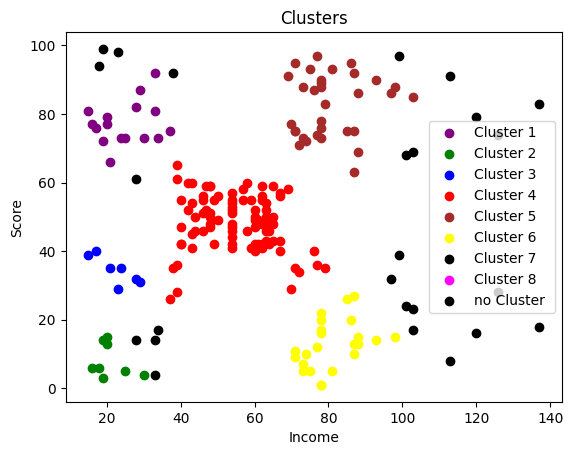

In [49]:
for i in range(8) :

    plt.scatter(x[db.labels_ ==i]['Annual Income (k$)'],x[db.labels_ ==i]['Spending Score (1-100)'],c=c[i],label =f'Cluster {i+1}')


plt.scatter(x[db.labels_ ==-1]['Annual Income (k$)'],x[db.labels_ ==-1]['Spending Score (1-100)'],c='black',label =f'no Cluster ')    
    

plt.title('Clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()


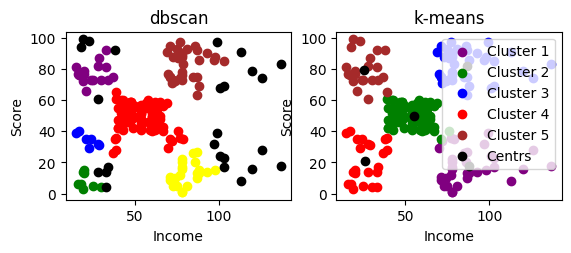

In [50]:


plt.subplot(2,2,1)
for i in range(8) :

    plt.scatter(x[db.labels_ ==i]['Annual Income (k$)'],x[db.labels_ ==i]['Spending Score (1-100)'],c=c[i],label =f'Cluster {i+1}')

plt.scatter(x[db.labels_ ==-1]['Annual Income (k$)'],x[db.labels_ ==-1]['Spending Score (1-100)'],c='black',label =f'no Cluster ')    
    
    
plt.title('dbscan')
plt.xlabel('Income')
plt.ylabel('Score')




plt.subplot(2,2,2)    
for i in range(5) :

    plt.scatter(x[y_km ==i]['Annual Income (k$)'],x[y_km ==i]['Spending Score (1-100)'],c=c[i],label =f'Cluster {i+1}')

plt.scatter(km.cluster_centers_[:5, 0], km.cluster_centers_[:5, 1], c = 'black', label = 'Centrs')
    
    

plt.title('k-means')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()


plt.show()
